In [1]:
! pip install cvxpy

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt, timedelta
import datetime as dt2
import statsmodels.api as sm
from matplotlib.pyplot import figure
from numpy import int64
from dateutil.relativedelta import relativedelta

%matplotlib inline 

In [3]:
understat_per_game_data = pd.read_csv('understat_per_game.csv') #reading the data
understat_per_game_data.shape

(24580, 30)

In [4]:
understat_per_game_data= understat_per_game_data.iloc[: , 1:] #Removing the first column which gives unwanted data

In [5]:
understat_per_game_data['date']=pd.to_datetime(understat_per_game_data['date'],format='%d/%m/%Y %H:%M') #Making sure the date column is read in a correct format

# *TASK 1*

 ### Name: Ankita Joshi, data set chosen according to my name and ordered preference

In [6]:
def new_dataset(df,student_id,first_name_start_letter,last_name_start_letter,ordered_preferences):
    
    # 1. Check if function inputs are valid
    if len(student_id)==8 and len(first_name_start_letter)==1 and len(last_name_start_letter)==1 and len(ordered_preferences)==6 and not df.empty:
        #print('Accepted')
        
        my_dataset=df.loc[(df['league'] == 'Bundesliga') | (df['league'] == 'EPL')] #Subsetting for letters A, and J from question.
        #print(my_dataset.shape)
        
        # 4. Check your first three preferences
        for i in ordered_preferences[:3]: #checking for first three preferences
            if i in set(my_dataset.league):
                1 #
                #print(i,"Already exists")
            else:
                L=df.loc[df['league'] == i]
                my_dataset=my_dataset.append(L) #Append to dataset if preference does not exist.
                
        #print(my_dataset.shape)
        # 5. Check your last preference
        if ordered_preferences[-1] in my_dataset['league'].values:
            #print('Last Exists')
        
            np.random.seed(int(student_id[0:3]))
            #In case last exists, we remove it from our dataset if the value is 1.
            #print(round(np.random.uniform(0,1)))
            
        else:
            2
            #print('Last Preference Does not exist')
         #As our last preference does not match, we proceed from here.
       
        #removing N random rows from dataset
        np.random.seed(int(student_id))
        N=np.random.randint(0,501)
        #print('Number of random rows',N)
        my_dataset = my_dataset.sample(frac=1).reset_index(drop=True) # Shuffling the dataframe
        my_dataset = my_dataset.drop(my_dataset.sample(N).index) # dropping N random rows
        #print(my_dataset.head())
        return my_dataset 
    
    else:
        Error='TypeError'
        return Error

#print(new_dataset(df,student_id,first_name_start_letter,last_name_start_letter,ordered_preferences))


In [7]:
#Function Inputs

df=understat_per_game_data
first_name_start_letter='A'
last_name_start_letter='J'
student_id='34048588'
ordered_preferences=['EPL','La_liga','Bundesliga','Serie_A','Ligue_1','RFPL'] #defining the ordered preferences

#calling the function based on inputs 
new_dataset(df,student_id,first_name_start_letter,last_name_start_letter,ordered_preferences)


,league,season,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,...,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,team,xG_diff,xGA_diff,xpts_diff
0,Bundesliga,2016.0,a,1.451890,0.721118,1.451890,0.721118,6.0,4.0,1.0,...,8.740741,236.0,27.0,11.850000,237.0,20.0,Bayer Leverkusen,0.451890,-0.278882,0.9652
1,EPL,2016.0,h,0.807128,0.132913,0.807128,0.132913,3.0,3.0,2.0,...,6.487179,253.0,39.0,4.918919,182.0,37.0,Manchester United,-1.192872,0.132913,-0.9773
2,EPL,2018.0,a,1.669090,1.881140,1.669090,1.120050,1.0,16.0,3.0,...,13.954545,307.0,22.0,6.833333,164.0,24.0,Huddersfield,-1.330910,-2.118860,1.2224
3,Bundesliga,2016.0,a,0.424457,0.724842,0.424457,0.724842,2.0,4.0,0.0,...,10.375000,249.0,24.0,9.137931,265.0,29.0,Schalke 04,0.424457,-1.275158,0.9689
4,Bundesliga,2017.0,h,1.645820,0.650812,1.645820,0.650812,7.0,4.0,2.0,...,6.277778,226.0,36.0,9.941176,169.0,17.0,Eintracht Frankfurt,-0.354180,-0.349188,-0.8054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12715,EPL,2016.0,a,1.656000,1.704100,1.656000,1.704100,8.0,10.0,1.0,...,7.217391,166.0,23.0,8.656250,277.0,32.0,Crystal Palace,0.656000,-1.295900,1.3448
12716,Bundesliga,2018.0,h,1.310290,1.861540,1.310290,1.103760,6.0,3.0,2.0,...,5.750000,161.0,28.0,9.961538,259.0,26.0,Wolfsburg,-0.689710,0.861540,-2.1190
12717,EPL,2017.0,h,0.724280,0.834423,0.724280,0.834423,8.0,2.0,1.0,...,8.388889,151.0,18.0,14.130435,325.0,23.0,Tottenham,-0.275720,-1.165577,1.2091
12718,La_liga,2019.0,a,2.312740,1.803320,2.312740,1.803320,5.0,13.0,2.0,...,33.666667,404.0,12.0,6.529412,111.0,17.0,Alaves,0.312740,0.803320,-1.2280


In [8]:
#assigning df to df1

df1=new_dataset(df,student_id,first_name_start_letter,last_name_start_letter,ordered_preferences) 
#df1.shape
#df1.league.unique()

# *TASK 2*


# 2.1

In [9]:
def cleaned_dataset(df, data_descrip):
    
    # 1. Check if function inputs are valid
    
    #creating a list of list to store the check parameters to later append to empty dataframe (Check summary)
    check_data=[]
    check_data_1=[] 
    check_data_1.append('Valid Function Inputs')
    if data_descrip.empty and df.empty:
        check_data_1.append(1) # 1 represents the check failed, invalid function inputs
    else:
        check_data_1.append(0) # 0 represents the check passed, valid function inputs
    check_data.append(check_data_1)

    # 2. Creates an empty table for the summary of your checks
    check_summary = pd.DataFrame(columns=['Description', 'Flag'])
    #print(check_summary)
    
    
    # 4. Checks if the data contains missing values
    check_data_2=[]
    check_data_2.append('Contains NaN values')
    if df.isnull().values.any():
        check_data_2.append(0) #0 corresponding to the df containing nan values.
    else:
        check_data_2.append(1) #1 corresponding to the df not containing  nan values.
    check_data.append(check_data_2)

    # 3. Checks if all columns are in the correct format
    df_Dtypes=df.dtypes.to_frame(name=None) #converting series to pd.Dataframe to check datatypes
    df_Dtypes.reset_index(inplace=True)
    df_Dtypes.columns=['Column','Datatype']
    DD=data_descrip.merge(df_Dtypes, how='inner',on='Column') #merging the two dataframes to compare datatype columns
    DD['Datatype_x']=DD['Datatype_x'].astype(str) #comparing the strings
    DD['Datatype_y']=DD['Datatype_y'].astype(str)
    #print(DD['Datatype_x'].equals(DD['Datatype_y']))
    
    check_data_3=[]
    check_data_3.append('Columns in correct format')
    if DD['Datatype_x'].equals(DD['Datatype_y'])== False:
        check_data_3.append(1) #1 corresponding to not having correct format
        
        # dropping all the rows with any nan value
        df=df.dropna().reset_index()
        
        #converting the datatypes into a dictionary from data_description.csv
        convert_dict=dict(zip(data_descrip.Column, data_descrip.Datatype)) 
        
        #changing the data types of our table to the ones given in data_description.csv file
        df = df.astype(convert_dict) 
    else:  
        check_data_3.append(0)
    check_data.append(check_data_3)
    
    my_dataset=df
    check_summary=pd.DataFrame(check_data,columns=['Description', 'Flag'])
    check_summary.index.names = ['ID'] #changing the index column to be the ID for the checks.

    #print(my_dataset.head())
    return check_summary,my_dataset

In [10]:
#Inputs

df=df1 
data_descrip=pd.read_csv('data_description.csv',index_col=False)

#Calling function and assigning it to variables 
cleaned_dataset(df, data_descrip)

(                  Description  Flag
 ID                                 
 0       Valid Function Inputs     0
 1         Contains NaN values     0
 2   Columns in correct format     1,
        index      league  season h_a        xG       xGA      npxG     npxGA  \
 0          0  Bundesliga  2016.0   a  1.451890  0.721118  1.451890  0.721118   
 1          1         EPL  2016.0   h  0.807128  0.132913  0.807128  0.132913   
 2          2         EPL  2018.0   a  1.669090  1.881140  1.669090  1.120050   
 3          3  Bundesliga  2016.0   a  0.424457  0.724842  0.424457  0.724842   
 4          4  Bundesliga  2017.0   h  1.645820  0.650812  1.645820  0.650812   
 ...      ...         ...     ...  ..       ...       ...       ...       ...   
 12309  12715         EPL  2016.0   a  1.656000  1.704100  1.656000  1.704100   
 12310  12716  Bundesliga  2018.0   h  1.310290  1.861540  1.310290  1.103760   
 12311  12717         EPL  2017.0   h  0.724280  0.834423  0.724280  0.834423   
 123

In [11]:
check_summary,my_dataset=cleaned_dataset(df, data_descrip)

In [12]:
check_summary

,Description,Flag
ID,,
0,Valid Function Inputs,0
1,Contains NaN values,0
2,Columns in correct format,1


In [13]:
my_dataset=my_dataset.iloc[: , 1:] #removing extra index column

# 2.2

In [14]:
# Transformation of "h_a" column of my_dataset column from 2.1
my_dataset['h_a_transformed'] = my_dataset['h_a'].apply(lambda x: 1 if x =='h' else 0) #transforming, h_a by using lambda, if condition.


# Transformation of "date" column
my_dataset['year'] = (pd.DatetimeIndex(my_dataset['date']).year)  #Using pandas.DatetimeIndex() to extract month and year and time
my_dataset['month'] = (pd.DatetimeIndex(my_dataset['date']).month)
my_dataset['time'] = (pd.DatetimeIndex(my_dataset['date']).time)


# Transformation of "wins", "draws", "loses" and "pts" column using cumulative summation.
my_dataset['cumulative_wins']=my_dataset.groupby(['team','season'])['wins'].cumsum()
my_dataset['cumulative_draws']=my_dataset.groupby(['team','season'])['draws'].cumsum()
my_dataset['cumulative_loses']=my_dataset.groupby(['team','season'])['loses'].cumsum()
my_dataset['cumulative_pts']=my_dataset.groupby(['team','season'])['pts'].cumsum()


# Print out the first five rows of your data set
my_dataset.head(5)

,league,season,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,...,xGA_diff,xpts_diff,h_a_transformed,year,month,time,cumulative_wins,cumulative_draws,cumulative_loses,cumulative_pts
0,Bundesliga,2016.0,a,1.451890,0.721118,1.451890,0.721118,6,4,1,...,-0.278882,0.9652,0,2016,12,23:00:00,0,1,0,1
1,EPL,2016.0,h,0.807128,0.132913,0.807128,0.132913,3,3,2,...,0.132913,-0.9773,1,2017,4,16:00:00,1,0,0,3
2,EPL,2018.0,a,1.669090,1.881140,1.669090,1.120050,1,16,3,...,-2.118860,1.2224,0,2019,3,15:00:00,0,0,1,0
3,Bundesliga,2016.0,a,0.424457,0.724842,0.424457,0.724842,2,4,0,...,-1.275158,0.9689,0,2016,9,19:30:00,0,0,1,0
4,Bundesliga,2017.0,h,1.645820,0.650812,1.645820,0.650812,7,4,2,...,-0.349188,-0.8054,1,2018,2,19:30:00,1,0,0,3


# 2.3

In [15]:
#to get the  Count, Mean, Standard Deviation, Minimum, 25th Quantile, 50th Quantile, 75th Quantile and Maximum.
my_dataset.describe() 

,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,xpts,wins,...,oppda_def,xG_diff,xGA_diff,xpts_diff,year,month,cumulative_wins,cumulative_draws,cumulative_loses,cumulative_pts
count,12314.000000,12314.000000,12314.000000,12314.000000,12314.000000,12314.000000,12314.000000,12314.000000,12314.000000,12314.000000,...,12314.000000,12314.000000,12314.000000,12314.000000,12314.000000,12314.000000,12314.000000,12314.000000,12314.000000,12314.000000
mean,1.360883,1.363829,1.255280,1.257452,6.062043,6.073575,1.383222,1.387120,1.381758,0.376726,...,24.343105,-0.022339,-0.023292,0.005926,2017.019571,6.589410,6.884928,4.485789,6.899383,25.140572
std,0.867727,0.872034,0.810727,0.813925,4.263842,4.275889,1.272521,1.275677,0.841006,0.484585,...,7.224972,0.963539,0.965876,1.044252,1.769516,3.812145,5.261766,3.196050,5.131000,17.423615
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,-5.943560,-5.943560,-2.943000,2014.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.711141,0.708430,0.658569,0.656320,3.000000,3.000000,0.000000,0.000000,0.652700,0.000000,...,19.000000,-0.598060,-0.600633,-0.659900,2016.000000,3.000000,3.000000,2.000000,3.000000,11.000000
50%,1.188850,1.189125,1.093295,1.093100,5.000000,5.000000,1.000000,1.000000,1.329100,0.000000,...,24.000000,0.097505,0.094080,0.085950,2017.000000,7.000000,6.000000,4.000000,6.000000,23.000000
75%,1.841568,1.843293,1.679248,1.686770,8.000000,8.000000,2.000000,2.000000,2.082350,1.000000,...,29.000000,0.608461,0.610705,0.729225,2019.000000,10.000000,10.000000,7.000000,10.000000,36.000000
max,6.630490,6.630490,6.610910,6.610910,42.000000,42.000000,10.000000,10.000000,3.000000,1.000000,...,65.000000,3.933000,3.933000,2.906700,2020.000000,12.000000,32.000000,18.000000,28.000000,100.000000


# *TASK 3*

# 3.1

In [16]:
#Inputs

df=my_dataset
team_name='Manchester United' #team_name has to be from one of the three leagues : EPL, La liga, Bundesliga

In [17]:
import matplotlib.pyplot as plt
def team_performance(df, team_name):
    """
    Outputs the summary table for subtask 3.1.
    :param df: A pandas DataFrame with your individual data.
    :param own_team: A string corresponding to the name of your team.
    :return: A pandas DataFrame with the summary table for your team.
    """
    # 1. Check if function inputs are valid
    if not df.empty and len(team_name) != 0:
        1
        #print('Accepted')
        
        # 2. Compute statistics
        team_data=df.loc[(df['team'] == team_name)] #Picking rows for the particular team to summarize on
        #print(team_data.shape)
        summary_tab=team_data.groupby(['season','h_a']).agg(count_wins=('wins', 'sum'), #groups by the seasons and aggregates the following parameters
                                             count_draws=('draws', 'sum'),
                                             count_loses=('loses', 'sum'),
                                             average_goals=('scored', 'mean'),
                                             expected_goals=('xG', 'mean'),
                                             expected_goals_against=('xGA', 'mean')).reset_index()
        
        
        # 3. Plot the results
        summary_tab['season']=summary_tab['season'].astype(int)
        league_summary_away=summary_tab.loc[(summary_tab['h_a'] == 'a')] #subsetting data for away and home
        summary_tab_home=summary_tab.loc[(summary_tab['h_a'] == 'h')]
        fig, axs = plt.subplots(2, 2,figsize=(17, 15)) #creating 4 subplots, using matplotlib
        axs[0, 0].plot(league_summary_away.season.values, league_summary_away.count_wins.values, label = "wins")
        axs[0, 0].plot(league_summary_away.season.values, league_summary_away.count_draws.values, label = "draws")
        axs[0, 0].plot(league_summary_away.season.values, league_summary_away.count_loses.values, label = "loses")
        axs[0, 0].set(xlabel="seasons")
        axs[0, 0].title.set_text('Away Games')
        axs[0, 0].legend()



        axs[0, 1].plot(league_summary_away.season.values, league_summary_away.average_goals.values, label = "scored")
        axs[0, 1].plot(league_summary_away.season.values, league_summary_away.expected_goals.values, label = "xG")
        axs[0, 1].plot(league_summary_away.season.values, league_summary_away.expected_goals_against.values, label = "xGA")
        axs[0, 1].title.set_text('Away Games')
        axs[0, 1].set(xlabel="seasons")
        axs[0, 1].legend()




        axs[1, 0].plot(summary_tab_home.season.values, summary_tab_home.count_wins.values, label = "wins")
        axs[1, 0].plot(summary_tab_home.season.values, summary_tab_home.count_draws.values, label = "draws")
        axs[1, 0].plot(summary_tab_home.season.values, summary_tab_home.count_loses.values, label = "loses")
        axs[1, 0].set(xlabel="seasons")
        axs[1, 0].title.set_text('Home Games')
        axs[1, 0].legend()




        axs[1, 1].plot(summary_tab_home.season.values, summary_tab_home.average_goals.values, label = "scored")
        axs[1, 1].plot(summary_tab_home.season.values, summary_tab_home.expected_goals.values, label = "xG")
        axs[1, 1].plot(summary_tab_home.season.values, summary_tab_home.expected_goals_against.values, label = "xGA")
        axs[1, 1].set(xlabel="seasons")
        axs[1, 1].title.set_text('Home Games')
        axs[1, 1].legend()

    
        # Print out head of summary tab
        
        
        summary_tab=summary_tab.head() 
        return summary_tab
    else:
        Error=('TypeError')
        return Error
    

,season,h_a,count_wins,count_draws,count_loses,average_goals,expected_goals,expected_goals_against
0,2014,a,6,8,5,1.105263,1.182740,1.181693
1,2014,h,13,2,3,2.166667,1.594414,0.950965
2,2015,a,7,4,8,1.157895,1.087697,1.313579
3,2015,h,12,5,2,1.421053,1.303051,0.773569
4,2016,a,10,5,3,1.555556,1.356674,0.920232


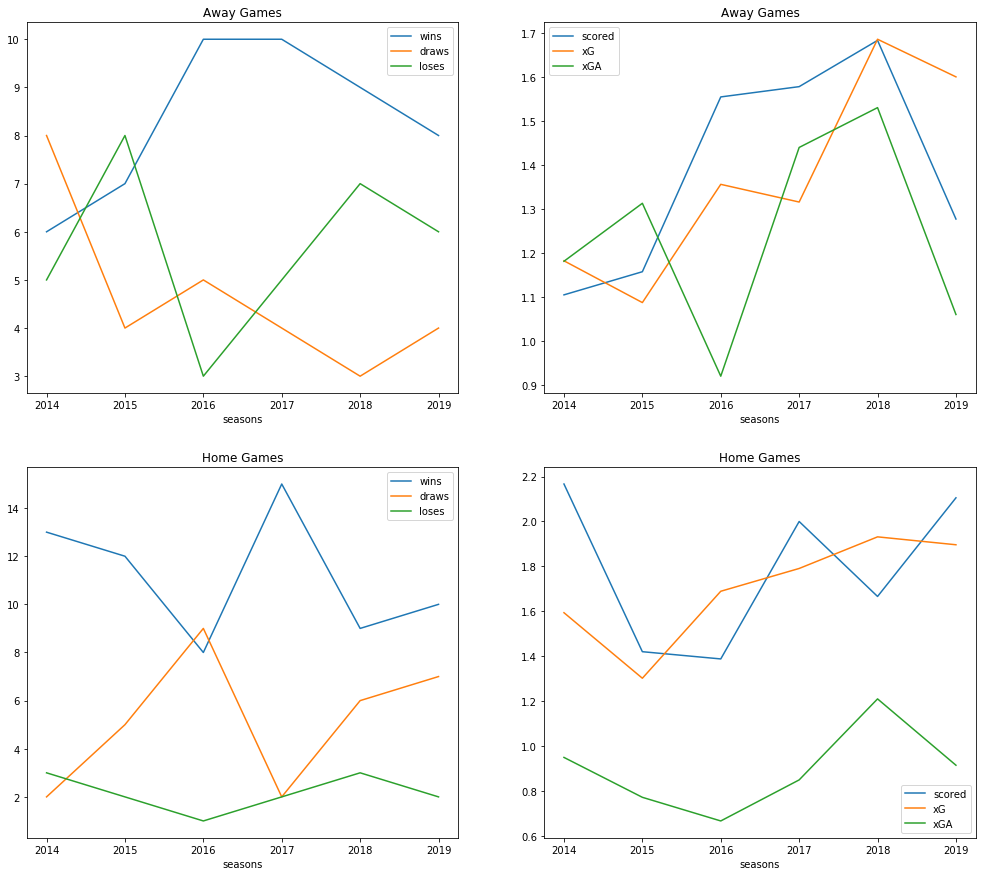

In [18]:
#Inputs

df=my_dataset
team_name='Manchester United' #chosen team_name has to be from one of the three leagues : EPL, La liga, Bundesliga

#calling function

team_performance(df, team_name)

# Interpreting the results

    According to the trends shown by the graphs for Manchester United, 
    
    1. In the year 2017 the team had a peak in the number of wins at their home games.
    2. Whereas the wins while at away games were a constant in the years 2016 and 2017 and loses dropped to  a low in 2016.
    
    3. At Away games, in the year 2018, we can see that the parameters scored and xG - Expected goals metric (statistical measure for quality of chances created and conceded), hit a peak and xGA - Expected goals against, was the lowest in the year 2016.
    4. At Home games, 2016 again recorded a low xGA.

# 3.2 

In [19]:
def opponent_performance(df, opponent_name, season):
    
    # 1. Check if function inputs are valid
    if not df.empty and len(opponent_name) != 0 and season is not None:
        1
        #print('Accepted')
        
        # 2. Summarize and prepare the data for plotting
        
        season1=str(season-1)+".0" #Taking data from previous season to judge the current seasons coach
        #print(season1)
        #turn season in the str type
        df['season'] = df['season'].astype('str')
        #print(Q3_2.head())
 
        #choose the corresponding last season's dataframe
        
        opponent=df.loc[(df['team'] == opponent_name) & (df['season'] == season1)]
        #print(opponent.shape)
        
        #grouping by on the year and month, using aggregate to get the statistics:
        
        opponent_stats=opponent.groupby(['year','month']).agg(Avg_power_of_pressure=('ppda_coef', 'mean'),
                                             Avg_power_of_opponent_pressure=('oppda_coef', 'mean'),
                                             Avg_deep=('deep', 'mean'),
                                             Avg_deep_allowed=('deep_allowed', 'mean'),
                                             c_wins=('wins', 'sum'),
                                             c_draws=('draws', 'sum'),
                                             c_loses=('loses', 'sum')).reset_index()
        
        opponent_stats['year_month'] = opponent_stats['year'].astype(str) + '_' + opponent_stats['month'].astype(str)# getting the year_month column for plotting
        
        # 3. Plot the results
        figure(figsize=(12, 7), dpi=80)
        plt.plot(opponent_stats.year_month.values, opponent_stats.Avg_power_of_pressure.values, label = "ppda_coef") #using matplotlib to plot the values
        plt.plot(opponent_stats.year_month.values, opponent_stats.Avg_power_of_opponent_pressure.values, label = "oppda_coef")
        plt.plot(opponent_stats.year_month.values, opponent_stats.Avg_deep.values, label = "deep")
        plt.plot(opponent_stats.year_month.values, opponent_stats.Avg_deep_allowed.values, label = "deep_allowed")
        plt.xlabel("Year_month of the Game Date")
        plt.legend()
        plt.show()
        
        summary_tab=opponent_stats.head()
        return summary_tab
    else:
        Error=('TypeError')
        return Error
    
   

    # Print out head of summary table

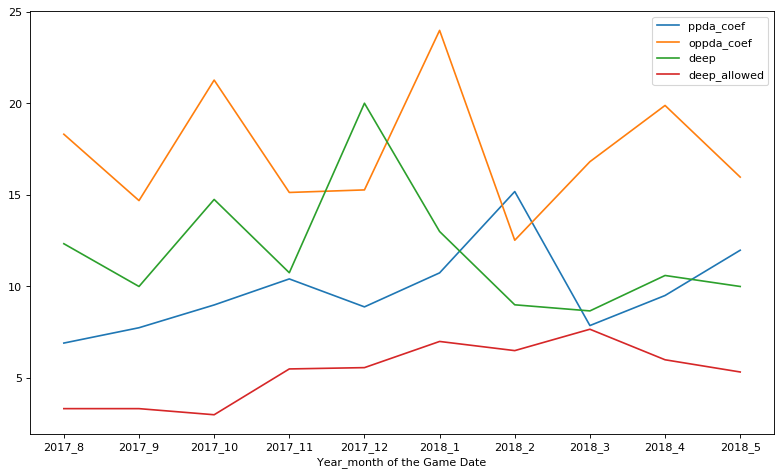

,year,month,Avg_power_of_pressure,Avg_power_of_opponent_pressure,Avg_deep,Avg_deep_allowed,c_wins,c_draws,c_loses,year_month
0,2017,8,6.911631,18.309304,12.333333,3.333333,1,0,2,2017_8
1,2017,9,7.748530,14.687049,10.000000,3.333333,2,1,0,2017_9
2,2017,10,8.991724,21.263029,14.750000,3.000000,3,0,1,2017_10
3,2017,11,10.412906,15.130759,10.750000,5.500000,3,0,1,2017_11
4,2017,12,8.887005,15.269955,20.000000,5.571429,2,4,1,2017_12


In [20]:
#Input
df=my_dataset
opponent_name='Arsenal' # Has to be from one of the three leagues EPL, La liga, Bundesliga
season=2018 #will be taken as the current season, please input in given format 

#Output
opponent_performance(df, opponent_name, season)

# Interpreting the results, for Arsenal

    1. The oppda_coef - Opponent ppda_coef (power of opponent’s pressure) has seen 
    a rise and fall throughout the season, with its local high peak at year_month 2018_1 of the game date , and local low at 2018_2.
    
    2.  deep - Passes completed within an estimated 20 yards of goal (crosses excluded),on the other hand was also at a lower value at 2018_2, and at its highest at 2017_12.
    
    3.The ppda_coef - Passes allowed per defensive action in the opposition half (power of pressure), was at its local peak at 2018_2.
    
    4.The deep_allowed - Opponent deep, has not seen much variation except its local high at 2018_3 of the game date.

# 3.3

In [21]:
def game_time_performance(df, team_name, opponent_name, season):
    
    # 1. Check if function inputs are valid
    if not df.empty and len(opponent_name) != 0 and len(team_name) !=0 and season is not None:
        1
        #print('Accepted')
        df['season']=df['season'].astype(float)
        
        #selecting the data subsets 
        team=df.loc[(df['team'] == team_name) & (df['season'] == season)]
        opponent_team=df.loc[(df['team'] == opponent_name) & (df['season'] == season)]

        team_name_w=team.groupby('time').agg(c_wins=('wins', 'sum'),
                                                     c_draws=('draws', 'sum'),
                                                     c_loses=('loses', 'sum')).reset_index()

        # Scaling the parameters from 0-1, so that they add up to one.
        team_name_w['total_base']=team_name_w["c_wins"]+team_name_w["c_draws"]+team_name_w["c_loses"]
        team_name_w["wins"]=team_name_w["c_wins"]/team_name_w['total_base']
        team_name_w["draws"]=team_name_w["c_draws"]/team_name_w['total_base']
        team_name_w["loses"]=team_name_w["c_loses"]/team_name_w['total_base']

        opponent_team_w=opponent_team.groupby('time').agg(c_wins=('wins', 'sum'),
                                                     c_draws=('draws', 'sum'),
                                                     c_loses=('loses', 'sum')).reset_index()



        opponent_team_w['total_base']=opponent_team_w["c_wins"]+opponent_team_w["c_draws"]+opponent_team_w["c_loses"]
        opponent_team_w["wins"]=opponent_team_w["c_wins"]/opponent_team_w['total_base']
        opponent_team_w["draws"]=opponent_team_w["c_draws"]/opponent_team_w['total_base']
        opponent_team_w["loses"]=opponent_team_w["c_loses"]/opponent_team_w['total_base']


        labels = list(team_name_w['time'])
        wins = list(team_name_w['wins'])
        draws = list(team_name_w['draws'])
        loses= list(team_name_w['loses'])
        #print(wins, draws,loses)

        x = np.arange(len(labels))  # the label locations
        width = 0.25  # the width of the team_names

        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
        fig.set_figheight(8)
        fig.set_figwidth(20)
        #plt.rcParams["figure.figsize"] = (10,8)
        rects1 = ax1.bar(x - width/2, wins, width, label='wins',align='center')
        rects2 = ax1.bar(x + width/2, draws, width, label='draws',align='center')
        rects3 = ax1.bar(x + width/2 + width, loses, width, label='loses',align='center')

        # Adding some text for labels, title and custom x-axis tick labels, etc.
        #ax.set_ylabel('Scores')
        ax1.set_title(team_name)
        ax1.set_xlabel('game_time')
        ax1.set_xticks(x)
        ax1.set_xticklabels(labels,rotation=90)
        ax1.legend()


        #opponent team
        labels = list(opponent_team_w['time'])
        wins = list(opponent_team_w['wins'])
        draws = list(opponent_team_w['draws'])
        loses= list(opponent_team_w['loses'])
        #print(wins, draws,loses)

        x = np.arange(len(labels))  # the label locations
        width = 0.20  # the width of the bar

        #fig, ax = plt.subplots()

        rects4 = ax2.bar(x - width/2, wins, width, label='wins',align='center')
        rects5 = ax2.bar(x + width/2, draws, width, label='draws',align='center')
        rects6 = ax2.bar(x + width/2 + width, loses, width, label='loses',align='center')

        # Adding some text for labels, title and custom x-axis tick labels, etc.
        #ax.set_ylabel('Scores')
        ax2.set_title(opponent_name)
        ax2.set_xlabel('game_time')
        ax2.set_xticks(x)
        ax2.set_xticklabels(labels,rotation=90)
        ax2.legend()

        summary_tab_own=team_name_w.head()
        summary_tab_opp=opponent_team_w.head()
        return summary_tab_own, summary_tab_opp
    else:
        Error=('TypeError')
        return Error
    

    
  
    
    # Print out head of summary tables

(       time  c_wins  c_draws  c_loses  total_base      wins     draws  loses
 0  15:00:00       1        0        0           1  1.000000  0.000000    0.0
 1  18:00:00       1        0        1           2  0.500000  0.000000    0.5
 2  19:00:00      10        3        0          13  0.769231  0.230769    0.0
 3  20:30:00       1        0        0           1  1.000000  0.000000    0.0
 4  21:15:00       2        0        0           2  1.000000  0.000000    0.0,
        time  c_wins  c_draws  c_loses  total_base      wins     draws  \
 0  00:00:00       2        0        0           2  1.000000  0.000000   
 1  00:30:00       1        0        0           1  1.000000  0.000000   
 2  18:00:00       8        0        0           8  1.000000  0.000000   
 3  19:00:00       9        1        1          11  0.818182  0.090909   
 4  20:15:00       0        1        0           1  0.000000  1.000000   
 
       loses  
 0  0.000000  
 1  0.000000  
 2  0.000000  
 3  0.090909  
 4  0.0000

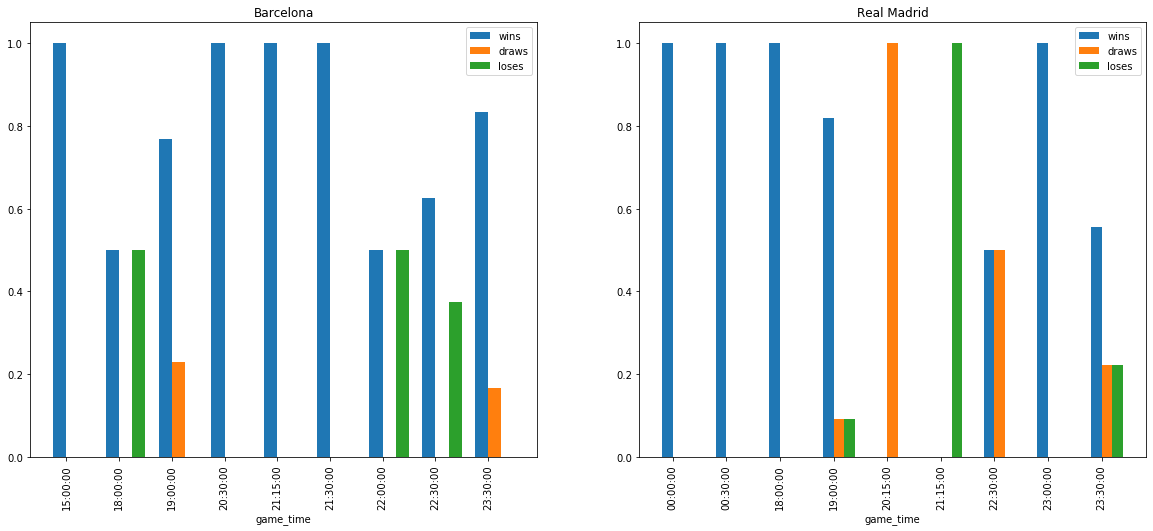

In [22]:
#Inputs
df=my_dataset
team_name='Barcelona'
opponent_name='Real Madrid'
season=2015 #Please input in format shown

#Output
game_time_performance(df, team_name, opponent_name, season)

# Interpreting results

    1. For our team, Barcelona from the league La_liga, we see that there is no such constraint regarding the starting time which is obeyed by the number of wins the team has scored. But we do see a constant trend of wins in the timeframe of 8:30 pm to 9:30 pm.
    2. For our opponent team Real Madrid, there is no hard constraint followed either, but a constant number of wins can be seen in the ealier hours than later.

# *TASK 4*

In [23]:
def performance_analysis(df, league_name, season):

    # 1. Check if function inputs are valid
    if not df.empty and len(league_name) != 0 and season is not None:
        
        #3.1 for league:
        
        league_data=df.loc[(df['league'] == league_name)] 
        #groups by the seasons , h/a and aggregates the following parameters:
        league_data['season']=league_data['season'].astype(float)
        league_summary=league_data.groupby(['season','h_a']).agg(count_wins=('wins', 'sum'),
                                             count_draws=('draws', 'sum'),
                                             count_loses=('loses', 'sum'),
                                             average_goals=('scored', 'mean'),
                                             expected_goals=('xG', 'mean'),
                                             expected_goals_against=('xGA', 'mean')).reset_index()



        #subsetting data for away and home
        league_summary_away=league_summary.loc[(league_summary['h_a'] == 'a')] 

        league_summary_home=league_summary.loc[(league_summary['h_a'] == 'h')]


        #creating 4 subplots, using matplotlib
        fig, axs = plt.subplots(2, 2,figsize=(17, 15)) 



        axs[0, 0].plot(league_summary_away.season.values, league_summary_away.count_wins.values, label = "wins")
        axs[0, 0].plot(league_summary_away.season.values, league_summary_away.count_draws.values, label = "draws")
        axs[0, 0].plot(league_summary_away.season.values, league_summary_away.count_loses.values, label = "loses")
        axs[0, 0].set(xlabel="seasons")
        axs[0, 0].title.set_text('Away Games')
        axs[0, 0].legend()
       


        axs[0, 1].plot(league_summary_away.season.values, league_summary_away.average_goals.values, label = "scored")
        axs[0, 1].plot(league_summary_away.season.values, league_summary_away.expected_goals.values, label = "xG")
        axs[0, 1].plot(league_summary_away.season.values, league_summary_away.expected_goals_against.values, label = "xGA")
        axs[0, 1].title.set_text('Away Games')
        axs[0, 1].set(xlabel="seasons")
        axs[0, 1].legend()




        axs[1, 0].plot(league_summary_home.season.values, league_summary_home.count_wins.values, label = "wins")
        axs[1, 0].plot(league_summary_home.season.values, league_summary_home.count_draws.values, label = "draws")
        axs[1, 0].plot(league_summary_home.season.values, league_summary_home.count_loses.values, label = "loses")
        axs[1, 0].set(xlabel="seasons")
        axs[1, 0].title.set_text('Home Games')
        axs[1, 0].legend()




        axs[1, 1].plot(league_summary_home.season.values, league_summary_home.average_goals.values, label = "scored")
        axs[1, 1].plot(league_summary_home.season.values, league_summary_home.expected_goals.values, label = "xG")
        axs[1, 1].plot(league_summary_home.season.values, league_summary_home.expected_goals_against.values, label = "xGA")
        axs[1, 1].set(xlabel="seasons")
        axs[1, 1].title.set_text('Home Games')
        axs[1, 1].legend()  
        
        
        
        # 3.2 for league
        season=season-1 #(To get data of the previous season as in subtask 3.2)
        L_data=df.loc[(df['league'] == league_name) & (df['season'] == season)]
        #print(L_data.shape)
        L_stats=L_data.groupby(['year','month']).agg(Avg_power_of_pressure=('ppda_coef', 'mean'),
                                             Avg_power_of_opponent_pressure=('oppda_coef', 'mean'),
                                             Avg_deep=('deep', 'mean'),
                                             Avg_deep_allowed=('deep_allowed', 'mean'),
                                             c_wins=('wins', 'sum'),
                                             c_draws=('draws', 'sum'),
                                             c_loses=('loses', 'sum')).reset_index()

        L_stats['year_month'] = L_stats['year'].astype(str) + '_' + L_stats['month'].astype(str)# getting the year_month column for plotting

        # 3. Plot the results
        figure(figsize=(12, 7), dpi=80)
        plt.plot(L_stats.year_month.values, L_stats.Avg_power_of_pressure.values, label = "ppda_coef") #using matplotlib to plot the values
        plt.plot(L_stats.year_month.values, L_stats.Avg_power_of_opponent_pressure.values, label = "oppda_coef")
        plt.plot(L_stats.year_month.values, L_stats.Avg_deep.values, label = "deep")
        plt.plot(L_stats.year_month.values, L_stats.Avg_deep_allowed.values, label = "deep_allowed")
        plt.xlabel("Year_month of the Game Date")
        plt.legend()
        plt.show()
        
        summary_tab_1=league_summary.head()
        summary_tab_2=L_stats.head()
        return summary_tab_1, summary_tab_2
    
    else:
        Error=('TypeError')
        return Error
    


    return summary_tab_1, summary_tab_2
    # Compute and print out results

<ipython-input-23-08d2401cc542>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_data['season']=league_data['season'].astype(float)


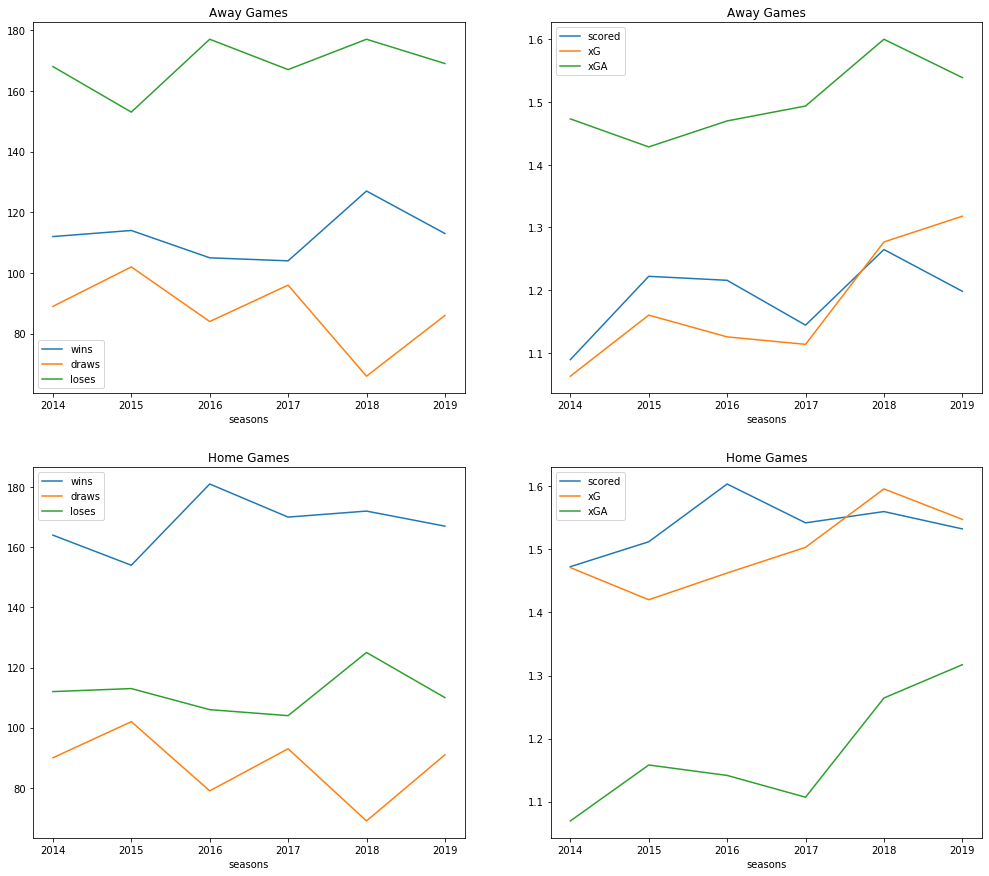

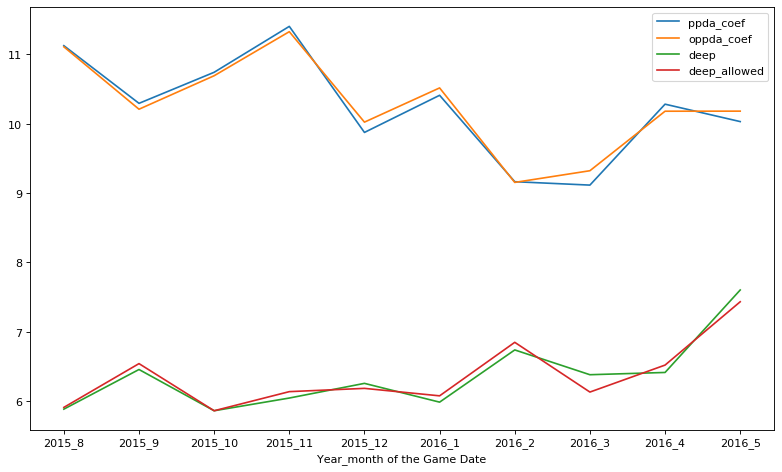

(   season h_a  count_wins  count_draws  count_loses  average_goals  \
 0  2014.0   a         112           89          168       1.089431   
 1  2014.0   h         164           90          112       1.472678   
 2  2015.0   a         114          102          153       1.222222   
 3  2015.0   h         154          102          113       1.512195   
 4  2016.0   a         105           84          177       1.215847   
 
    expected_goals  expected_goals_against  
 0        1.063054                1.473071  
 1        1.471234                1.069322  
 2        1.160373                1.428381  
 3        1.420222                1.158083  
 4        1.125681                1.469821  ,
    year  month  Avg_power_of_pressure  Avg_power_of_opponent_pressure  \
 0  2015      8              11.125586                       11.109190   
 1  2015      9              10.294251                       10.209549   
 2  2015     10              10.741989                       10.692274   
 3  2

In [24]:
#Inputs
df=my_dataset
league_name='EPL'
season=2016 #Please give inputs in formats shown to avoid any errors, corresponding to 3.2

#Output
performance_analysis(df, league_name, season)

# Interpreting results: For three leagues:
## NOTE: Please input the following league names in TASK 4 input cell to see their respective graphs for corresponding explainations

    1. EPL:
       - In home and away games for EPL league, we notice that the maginitude of wins is higher in home games than in the away games. With the local peak for wins hitting in the year 2016.
        - The xGA-Expected goals against is higher in away games than in home games for EPL.
        
    2. La_Liga:
        - Following a similar trend to EPL, we see that teams in La_liga have higher maginitude of wins in home games than in away.
        - The number of goals scored is also higher in home games with its local peak in the year 2016.
       
    3. Bundesliga:
        - Furthermore a very similar trend for Bundesliga where wins are more in home matches than away.
        - The xG - Expected goals metric (statistical measure for quality of chances created and conceded), and scored goals sharing a similar high local peak for the teams in the year 2018 at home games, xGA was at peak in 2018 for away games
        
    For all three leagues the trends shown by ppda_coef - Passes allowed per defensive action in the opposition half (power of pressure), and the oppda_coef - Opponent ppda_coef (power of opponent’s pressure) are along very similar lines respectively.
    As well as the trends shown by deep - Passes completed within an estimated 20 yards of goal (crosses excluded), and the deep_allowed - Opponent deep shown respectively for teams among the 3 leagues

# *TASK 5*

#Task5
https://ai538393399.wordpress.com/2020/11/25/svm-using-cvxpy/

In [1]:
import cvxpy as cp
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


# 1. Get the data subset

dataset=df.loc[(df['team'] == 'Barcelona')] 

# 2. Separate training and testing data

np.random.seed(340)
X, y = dataset[['xG', 'xGA', 'npxG', 'npxGA', 'deep',
               'deep_allowed','npxGD', 'ppda_coef', 'ppda_att', 'ppda_def', 'xGA_diff',
               'xpts_diff', 'h_a_transformed','missed','cumulative_wins', 'cumulative_draws', 'cumulative_loses',
               'cumulative_pts']], dataset['wins']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) #training=80%, testing=20%


# 3. Standardize the independet variables and recode dependet variable
standardized_test=preprocessing.scale(X_test)
standardized_train=preprocessing.scale(X_train)

y_train['wins']=y_train['wins'].replace(0,-1)
y_test['wins']=y_test['wins'].replace(0,-1)

#into array
target_train=y_train['wins'].values
target_test=y_test['wins'].values

# 4. Define the input variables for the optimization problem

beta = cp.Variable((n,1))
v = cp.Variable()
loss = cp.sum(cp.pos(1 - cp.multiply(Y, X @ beta - v)))
reg = cp.norm(beta, 1)
lambd = cp.Parameter(nonneg=True)
prob = cp.Problem(cp.Minimize(loss/m + lambd*reg))


# Compute a trade-off curve and record train and test error.
TRIALS = 100
train_error = np.zeros(TRIALS)
test_error = np.zeros(TRIALS)
lambda_vals = np.logspace(-2, 0, TRIALS)
beta_vals = []

for i in range(TRIALS):
    lambd.value = lambda_vals[i]
    prob.solve()
    train_error[i] = (np.sign(X.dot(beta_true) + offset) != np.sign(X.dot(beta.value) - v.value)).sum()/m
    test_error[i] = (np.sign(X_test.dot(beta_true) + offset) != np.sign(X_test.dot(beta.value) - v.value)).sum()/TEST
    beta_vals.append(beta.value)

# 5. Solve the problem
# [...]
# 6. Print out results
